In [1]:
import torch
import torch.nn as nn
from torchvision import transforms,datasets,models
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from PIL import Image
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
import warnings
import os
import torch.nn.functional as F

warnings.filterwarnings("ignore")

device=  ("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

keith_dir = "data/keith"
print(os.listdir(keith_dir))

not_keith_dir = "data/not_keith"
print(os.listdir(not_keith_dir))

data_dir = "data"
print(os.listdir(data_dir))

labels = ['keith','not_keith']

cuda:0
['-the-Beatles-film-Yellow-Submarine-with-his-girlfriend-Anita-Pallenberg-1968.jpg', '14_04_19.jpg', '2019-Blog-callout_x3uer3.jpg', '2Fmethode2Fsundaytimes2Fprod2Fweb2Fbin2F8473d7b6-2e07-11ed-b452-5e9d5f6d1a9f.jpg', '3431213690_35f403b5fd_b.jpg', '34393d6e5f5d0e83b91aa4743b5385b0.jpg', '4041672Bcopia.jpg', '71FbBVcOlVL._AC_UF8941000_QL80_.jpg', '7b6b17dd29fde73e9a19cc38611cbc6f.jpg', 'd54b6dc4d9976df06df69ba0b4310daf.jpg', 'download.jpg', 'e9248f651a20a7d027eea5c330e19b7d.jpg', 'ejx1sdhf1kh81.jpg', 'faded.jpg', 'FMgcoj9VnrVa3uA6UhtWCm-1200-80.jpg', 'GYhMIa4WAAAUV1c.png', 'hqdefault.jpg', 'image.jpeg', 'image10.jpeg', 'image11.jpeg', 'image12.jpeg', 'image13.jpeg', 'image15.jpeg', 'image16.jpeg', 'image17.jpeg', 'image18.jpeg', 'image20.jpeg', 'image22.jpeg', 'image23.jpeg', 'image24.jpeg', 'image26.jpeg', 'image28.jpeg', 'image29.jpeg', 'image3.jpeg', 'image31.jpeg', 'image33.jpeg', 'image35.jpeg', 'image36.jpeg', 'image38.jpeg', 'image39.jpeg', 'image41.jpeg', 'image5.jpeg', '

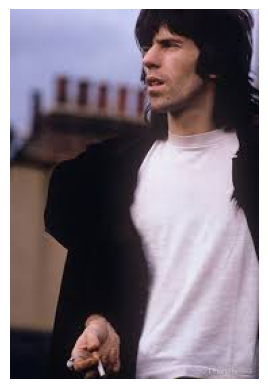

In [2]:
keith = Image.open('data/keith/image8.jpeg')
plt.imshow(keith)
plt.axis("off")
plt.show()

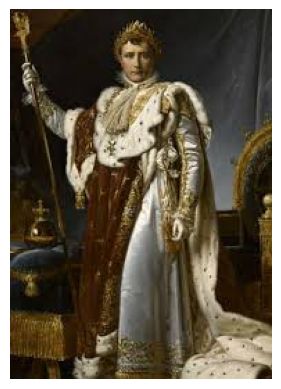

In [4]:
napoleon = Image.open("data/not_keith/napolean.jpg")
plt.imshow(napoleon)
plt.axis("off")
plt.show()

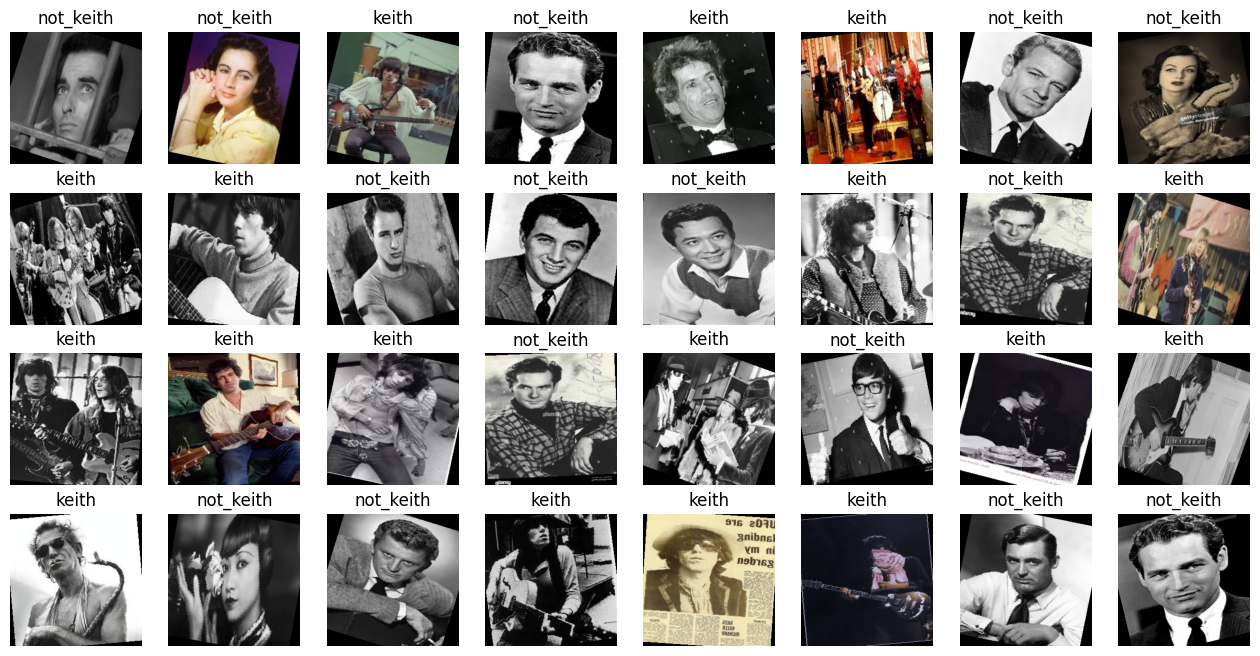

In [7]:

transformed_data = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])




dataset = datasets.ImageFolder(data_dir,transform=transformed_data)




train_split = int(len(dataset) * 0.8)
test_split = len(dataset) - train_split

train_data,test_data = random_split(dataset, lengths=[train_split,test_split])


BATCH_SIZE = 64
epochs = 10
learning_rate = 0.001


train_dataloader = torch.utils.data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)






images,labels = next(iter(train_dataloader))


fig,axs = plt.subplots(4,8,figsize=(16,8))


for i,ax in enumerate(axs.flat):
    image = img_inv(images[i])
    ax.imshow(image)
    ax.set_title(dataset.classes[labels[i]])
    ax.axis("off")
plt.show()


In [8]:
"""Resnet18 pretrained model"""
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False


for param in model.layer4.parameters():
    param.requires_grad = True




num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features,512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512,2)
)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:


optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()




for epoch in range(epochs):
    running_loss = 0.0
    for i,(images,labels) in enumerate(train_dataloader):
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_dataloader):.4f}")

Epoch [1/10], Loss: 0.5216
Epoch [2/10], Loss: 0.2581
Epoch [3/10], Loss: 0.0695
Epoch [4/10], Loss: 0.0531
Epoch [5/10], Loss: 0.0247
Epoch [6/10], Loss: 0.0101
Epoch [7/10], Loss: 0.0101
Epoch [8/10], Loss: 0.0019
Epoch [9/10], Loss: 0.0238
Epoch [10/10], Loss: 0.0015


In [10]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_pred = []
    y_pred_prob = []
    y_test = []
    for images,labels in test_dataloader:
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        _,preds = torch.max(outputs.data,1)
        y_pred.extend(preds.cpu().numpy())
        y_test.extend(labels.cpu().numpy())
        probs = F.softmax(outputs,dim=1)[:,1].cpu().numpy()
        y_pred_prob.extend(probs)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        
test_acc = 100 * correct / total
print(F"Testing Accuracy: {test_acc:.2f}%")



Testing Accuracy: 88.10%


In [11]:
"""Classification Report"""
clf_rpt = classification_report(y_test,y_pred)
print(f"Classification Report: {clf_rpt}")


"""Roc/Auc score and curves"""


print("ROC/AUC score from resnet18 model\n")
print(f'{roc_auc_score(y_test,y_pred_prob)*100:.2f}%')


Classification Report:               precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.81      1.00      0.89        21

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.88        42
weighted avg       0.90      0.88      0.88        42

ROC/AUC score from resnet18 model

98.64%


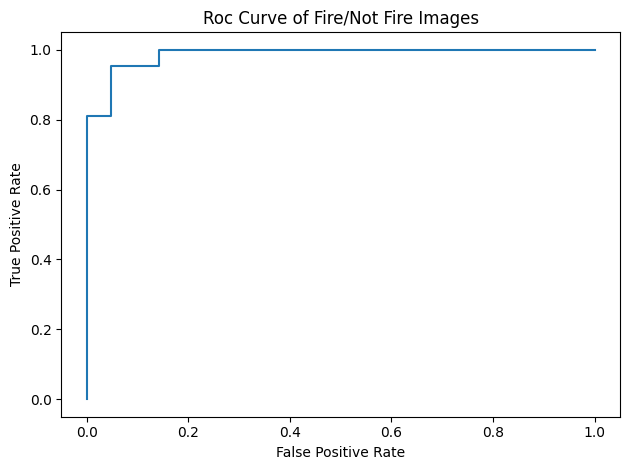

In [12]:
def plot_roc_cur(y_test,y_pred_prob):
    fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Roc Curve of Fire/Not Fire Images")

plot_roc_cur(y_test, y_pred_prob)
plt.tight_layout()
plt.show()

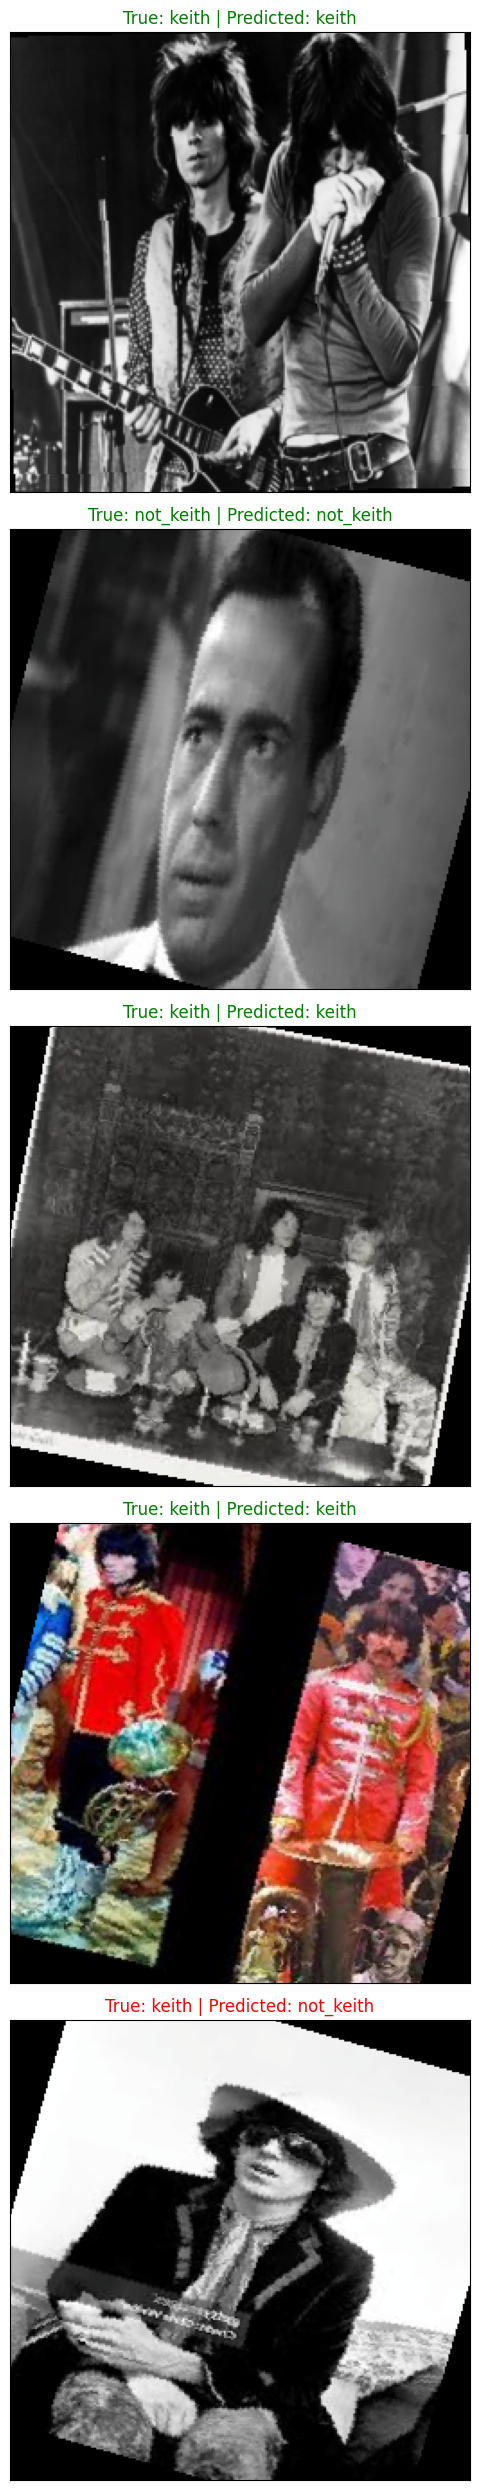

In [13]:
rand_indices = np.random.choice(len(y_pred), size=min(5,len(y_pred)), replace=False)
plt.figure(figsize=(10, 5 * len(rand_indices)))
for i, index in enumerate(rand_indices):
    image = img_inv(test_data[index][0])
    plt.subplot(len(rand_indices),1,i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    predicted_class = dataset.classes[y_pred[index]]
    true_class = dataset.classes[y_test[index]]
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'True: {true_class} | Predicted: {predicted_class}', color=color, fontsize=12)

plt.tight_layout()
plt.show()